In [14]:
import numpy as np
import nibabel as nib
from scipy.fftpack import fft
import matplotlib.pyplot as plt
from docopt import docopt
from nilearn import plotting, image

In [3]:
%matplotlib inline

In [5]:
-

In [9]:
#load in func and mask data
func_img = nib.load('/scratch/djohnston/faLFF/practice/ABIDE_pcp/cpac/nofilt_noglobal/Pitt_0050013_func_preproc.nii.gz')
func_data = func_img.get_data()

mask_img = nib.load('/scratch/edickie/saba_PINT/ciftify_fmriprep/ds000030_R1.0.5/out/fmriprep/sub-11052/func/sub-11052_task-rest_bold_space-T1w_brainmask.nii.gz')
mask_data = mask_img.get_data()

#define affine array
affine = func_img.affine

#define x,y,z,t coordinates
x,y,z,t = func_data.shape

#manually create mask 
std = np.std(func_data, axis=(0, 1, 2))
mask = np.where(func_data > std, func_data, 0)

#find indices where mask does not = 0
indx,indy,indz,indt = np.where(mask != 0)

#create empy array to save values
falff_vol = np.zeros((x,y,z))

#loop through x,y,z indices, send to calculate_falff func
for x,y,z, t in zip(indx,indy,indz,indt):
    falff_vol[x,y,z] = calculate_falff(func_data[x,y,z,:])
    
#save falff values to nifti file 
output_3D = nib.Nifti1Image(falff_vol, affine)
output_3D.to_filename('/scratch/djohnston/faLFF/practice/test_out_falff10.nii.gz')

/opt/quarantine/python/3.6_ciftify_01/build/lib/python3.6/site-packages/scipy/ndimage/measurements.py:272: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return _nd_image.find_objects(input, max_label)


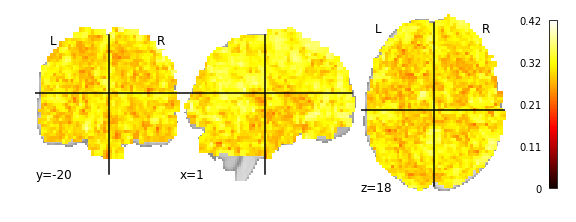

In [37]:
plotting.plot_stat_map('/scratch/djohnston/faLFF/practice/test_out_falff10.nii.gz')

/opt/quarantine/python/3.6_ciftify_01/build/lib/python3.6/site-packages/scipy/ndimage/measurements.py:272: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return _nd_image.find_objects(input, max_label)


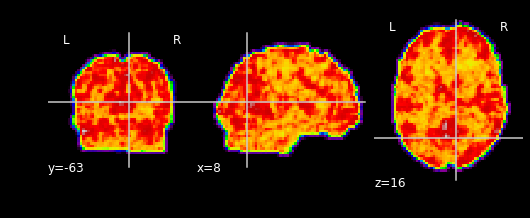

In [40]:
from nilearn import plotting, image

img = image.load_img('/scratch/djohnston/faLFF/practice/test_out_falff10.nii.gz')


smoothed_img = image.smooth_img(img, 4)
    
plotting.plot_epi(smoothed_img)

/opt/quarantine/python/3.6_ciftify_01/build/lib/python3.6/site-packages/scipy/ndimage/measurements.py:272: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return _nd_image.find_objects(input, max_label)


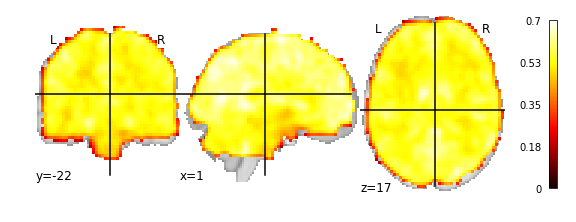

In [11]:
plotting.plot_stat_map('/scratch/djohnston/faLFF/practice/ABIDE_pcp/cpac/nofilt_noglobal/Pitt_0050013_falff.nii.gz')

/opt/quarantine/python/3.6_ciftify_01/build/lib/python3.6/site-packages/scipy/ndimage/measurements.py:272: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return _nd_image.find_objects(input, max_label)


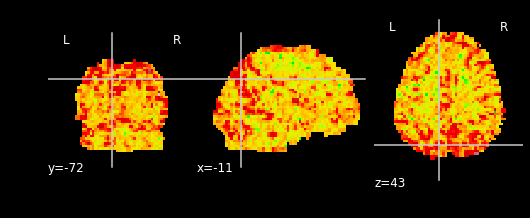

In [34]:
plotting.plot_epi('/scratch/djohnston/faLFF/practice/test_out_falff10.nii.gz')

/opt/quarantine/python/3.6_ciftify_01/build/lib/python3.6/site-packages/scipy/ndimage/measurements.py:272: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return _nd_image.find_objects(input, max_label)


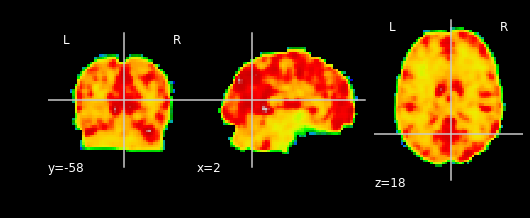

In [13]:
plotting.plot_epi('/scratch/djohnston/faLFF/practice/ABIDE_pcp/cpac/nofilt_noglobal/Pitt_0050013_falff.nii.gz')

/opt/quarantine/python/3.6_ciftify_01/build/lib/python3.6/site-packages/scipy/ndimage/measurements.py:272: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return _nd_image.find_objects(input, max_label)


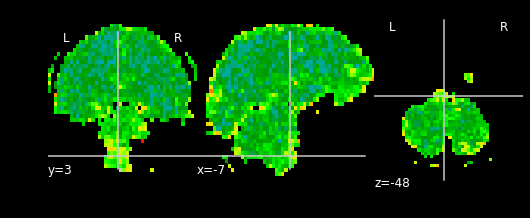

In [31]:
plotting.plot_epi('/scratch/djohnston/faLFF/practice/praccy2.nii.gz')

/opt/quarantine/python/3.6_ciftify_01/build/lib/python3.6/site-packages/scipy/ndimage/measurements.py:272: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return _nd_image.find_objects(input, max_label)


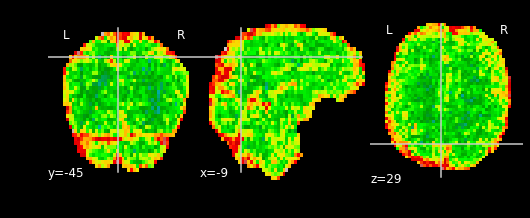

In [33]:
plotting.plot_epi('/scratch/djohnston/faLFF/practice/praccy3.nii.gz')

/opt/quarantine/python/3.6_ciftify_01/build/lib/python3.6/site-packages/scipy/ndimage/measurements.py:272: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return _nd_image.find_objects(input, max_label)


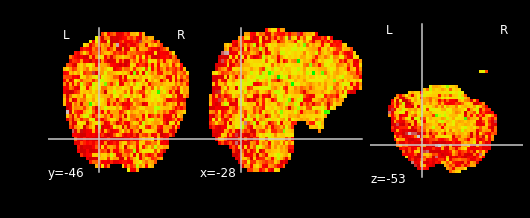

In [35]:
plotting.plot_epi('/scratch/djohnston/faLFF/practice/praccy3.nii.gz')